In [94]:
from matplotlib import pyplot as plt 
import numpy as np 
from astropy.io import fits
#fits_image_filename = fits.util.get_testdata_filepath('result.fits.gz')
import matplotlib.cm as cm
import pandas as pd



## Loading Gaia data

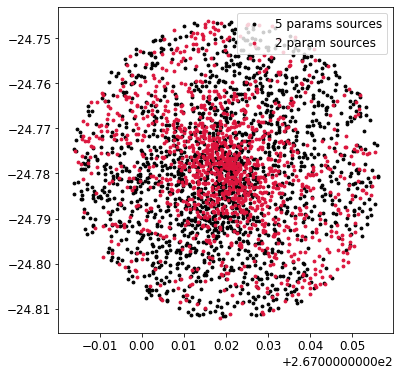

In [95]:
hdu = fits.open('Tr_5_all_2_arcmin-result.fits.gz')
data = hdu[1].data
ra = np.asarray(data['ra'])
dec = np.asarray(data['dec'])
mag = data['phot_g_mean_mag']

hdu = fits.open('Tr_5_5par_2_arcmin-result.fits.gz')
data = hdu[1].data
ra5 = np.asarray(data['ra'])
dec5 = np.asarray(data['dec'])
mag5 = data['phot_g_mean_mag']

plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.scatter(ra5,dec5 , s=8 , color='k' , label='5 params sources')
hdu = fits.open('Tr_5_2par_2_arcmin-result.fits.gz')
data = hdu[1].data
ra2 = np.asarray(data['ra'])
dec2 = np.asarray(data['dec'])
mag5 = data['phot_g_mean_mag']
ax.scatter(ra2,dec2 , s=8 , color='crimson' , label='2 param sources')
plt.legend(loc=1)
#plt.savefig('gaia_chandra_sources.png')
plt.show()

#### Plot gaia data

## Chandra Data
267.02,-24.7791666267.02,-24.7791666

In [96]:
!wget -O chandra.xml 'http://cda.cfa.harvard.edu/csc2scs/coneSearch?RA=267.02&DEC=-24.7791666&SR=0.033333&VERB=2'

--2021-06-30 02:26:53--  http://cda.cfa.harvard.edu/csc2scs/coneSearch?RA=267.02&DEC=-24.7791666&SR=0.033333&VERB=2
Resolving cda.cfa.harvard.edu (cda.cfa.harvard.edu)... 131.142.198.67
Connecting to cda.cfa.harvard.edu (cda.cfa.harvard.edu)|131.142.198.67|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/xml]
Saving to: ‘chandra.xml’

chandra.xml             [     <=>            ]  64.80K  66.6KB/s    in 1.0s    

2021-06-30 02:27:04 (66.6 KB/s) - ‘chandra.xml’ saved [66359]



In [97]:
from astropy.io.votable import parse_single_table
table = parse_single_table("chandra.xml")
xdata = table.array
x_ra = [x[1] for x in xdata]
x_dec = [x[2] for x in xdata]

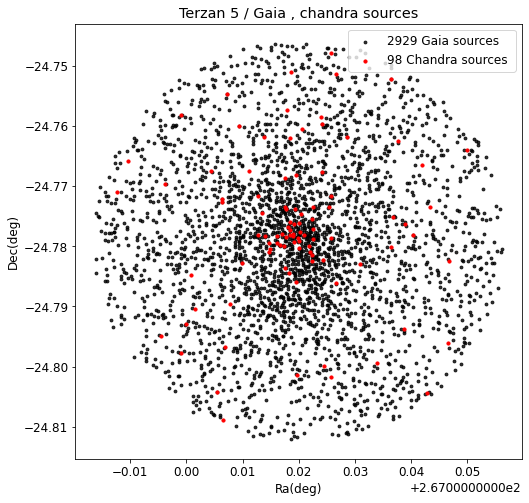

In [98]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
lab_opt = '{} Gaia sources '.format(len(ra))
lab_x = '{} Chandra sources '.format(len(x_ra))
ax.scatter(ra,dec , s=8 , color='k' , label=lab_opt , alpha=0.8)
ax.scatter(x_ra,x_dec, s=10 , color='red' , label=lab_x , alpha=1)
ax.set_xlabel('Ra(deg)')
ax.set_ylabel('Dec(deg)')
plt.legend(loc=1)
plt.title('Terzan 5 / Gaia , chandra sources')
plt.savefig('gaia_chandra_sources.jpg')
plt.show()

## Cross-Match

In [99]:
xm_data = np.loadtxt('5par_xmatch.csv' , delimiter=',' , usecols=[2,3])
xm5_ra = xm_data[:,0]
xm5_dec = xm_data[:,1]

xm_data = np.loadtxt('2par_xmatch.csv' , delimiter=',' , usecols=[2,3])
xm2_ra = xm_data[:,0]
xm2_dec = xm_data[:,1]

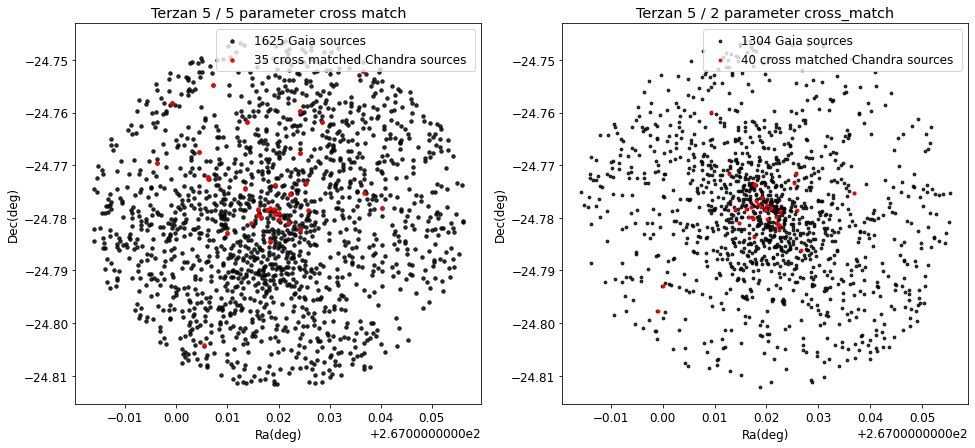

In [103]:
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(121)
lab_opt = '{} Gaia sources '.format(len(ra5))
lab_x = '{} cross matched Chandra sources '.format(len(xm5_ra))
ax1.scatter(ra5,dec5  , s=12 ,color='k' , label=lab_opt , alpha=0.8)
ax1.scatter(xm5_ra,xm5_dec,s=12,color='red' , label=lab_x , alpha=1)
ax1.set_xlabel('Ra(deg)')
ax1.set_ylabel('Dec(deg)')
plt.legend(loc=1)
plt.title('Terzan 5 / 5 parameter cross match')

ax = fig.add_subplot(122, sharey=ax1)
lab_opt = '{} Gaia sources '.format(len(ra2))
lab_x = '{} cross matched Chandra sources '.format(len(xm2_ra))
ax.scatter(ra2,dec2 , s=8 , color='k' , label=lab_opt , alpha=0.8)
ax.scatter(xm2_ra,xm2_dec, s=8 , color='red' , label=lab_x , alpha=1)
ax.set_xlabel('Ra(deg)')
ax.set_ylabel('Dec(deg)')
plt.legend(loc=1)
plt.title('Terzan 5 / 2 parameter cross_match')

plt.savefig('gaia_chandra_xm.jpg')

plt.show()

In [101]:
import pandas as pd

In [72]:
dist_data = pd.read_csv('dist_info.csv')
r_est = dist_data['r_est'].to_numpy()/1000
r_low = dist_data['r_lo'].to_numpy()/1000
r_hi = dist_data['r_hi'].to_numpy()/1000
dec = dist_data['dec'].to_numpy()

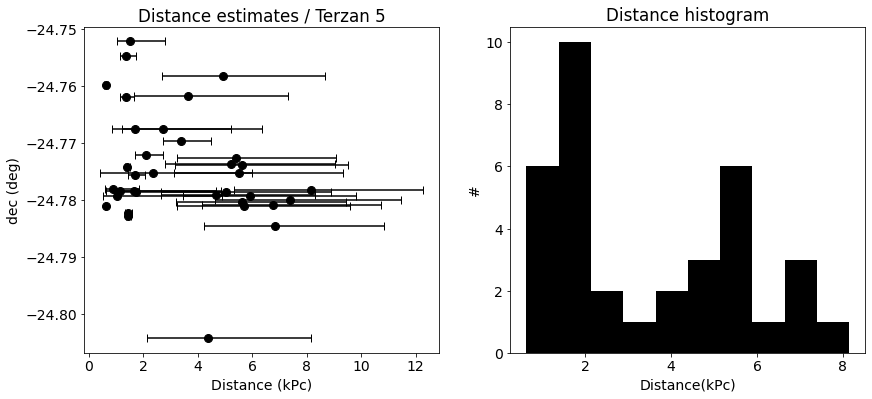

In [74]:
plt.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
#ax.set_aspect(3.0)
##lab_opt = '{} Gaia sources '.format(len(ra))
#lab_x = '{} cross matched Chandra sources '.format(len(xm_ra))
ax.errorbar(r_est , dec , xerr=(r_est-r_low , r_hi-r_est) , marker='o', markersize=8,linestyle='none' , capsize=4 , color='k')
#plt.legend()
plt.title('Distance estimates / Terzan 5')
#plt.savefig('gaia_chandra_xm.png')
ax.set_xlabel('Distance (kPc)')
ax.set_ylabel('dec (deg)')
ax2 = fig.add_subplot(122)
ax2.hist(r_est , color='k')
ax2.set_xlabel('Distance(kPc)')
ax2.set_ylabel('#')
ax2.set_title('Distance histogram')
plt.savefig('ter_5_dist.jpg')
plt.show()